In [1455]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,mean_squared_log_error

In [1456]:
# Let us import the train data to a dataframe

train_df=pd.read_csv(r'C:\Users\ADMIN\Desktop\Datascience Class\Notebook\Black Friday\train.csv')

In [1457]:
# Let us import the test data to a dataframe

test_df=pd.read_csv(r'.\Black Friday\test.csv')

In [1458]:
# Let us analyse the train and test data

train_df.shape

#We have 12 columns and 550068 rows of train data

(550068, 12)

In [1459]:
test_df.shape

(233599, 11)

In [1460]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [1461]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [1462]:
train_df['Source']='train'
test_df['Source']='test'

In [1463]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
 11  Source                      233599 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 21.4+ MB


In [1464]:
train_df=pd.concat([train_df,test_df])

In [1465]:
train_df.shape

(783667, 13)

In [1466]:
# Let us count the data types in the train dataset
train_df.dtypes.value_counts()

object     6
int64      4
float64    3
dtype: int64

In [1467]:
train_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


#### Observations from the train data
#### There are 5 objects, 5 int and 2 float datatypes.
#### Product Category 2 and Product Category 3 has null values


<AxesSubplot:>

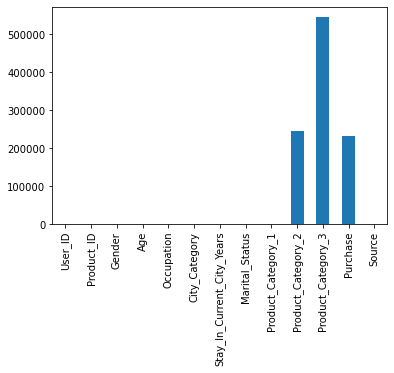

In [1468]:
train_df.isnull().sum().plot.bar()
# We could observe that there are null values in Prod Category 1 and Prod Category 2 which is one of the critical feature for Purchase.
# Let us analyse the data and identify options to fill in the missing values

In [1469]:
train_df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
Source                             0
dtype: int64

In [1470]:
## Let us check the duplicate data in the dataset..
train_df.duplicated().sum()

# There are no duplicates in the train data however we have null values in few columns

0

In [1471]:
train_df.Product_ID.unique().shape

(3677,)

In [1472]:
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Source
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,train


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

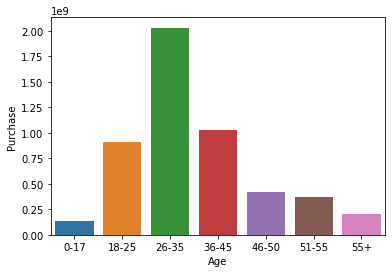

In [1473]:
df_age_grp=train_df.groupby(['Age'])['Purchase'].sum().reset_index()
sns.barplot(x='Age',y='Purchase',data=df_age_grp)

# Age Group 26-35 has contributed the highest in purchasing the products

array([[<AxesSubplot:title={'center':'User_ID'}>,
        <AxesSubplot:title={'center':'Occupation'}>,
        <AxesSubplot:title={'center':'Marital_Status'}>],
       [<AxesSubplot:title={'center':'Product_Category_1'}>,
        <AxesSubplot:title={'center':'Product_Category_2'}>,
        <AxesSubplot:title={'center':'Product_Category_3'}>],
       [<AxesSubplot:title={'center':'Purchase'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

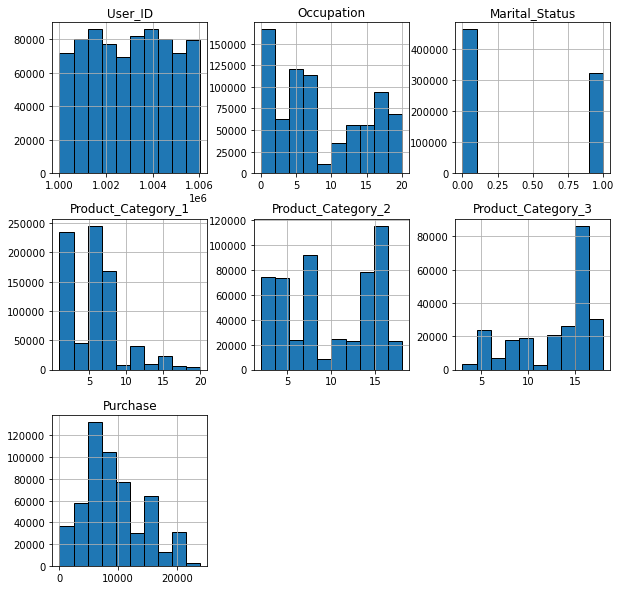

In [1474]:
train_df.hist(edgecolor='black',figsize=(10,10))

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

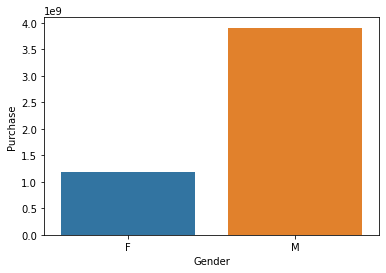

In [1475]:
df_gen_grp=train_df.groupby(['Gender'])['Purchase'].sum().reset_index()
sns.barplot(x='Gender',y='Purchase',data=df_gen_grp)

# Males has purchased for a larger sum values

<AxesSubplot:>

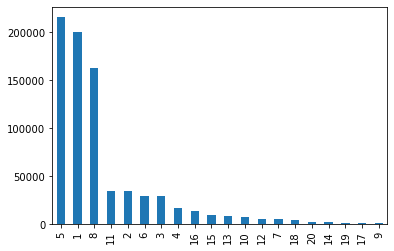

In [1476]:
train_df.Product_Category_1.value_counts().plot.bar()

<AxesSubplot:>

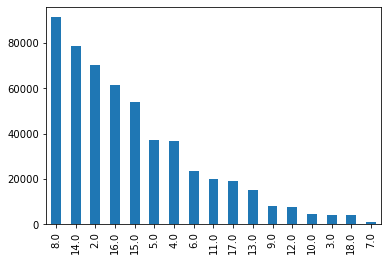

In [1477]:
train_df.Product_Category_2.value_counts().plot.bar()

<AxesSubplot:>

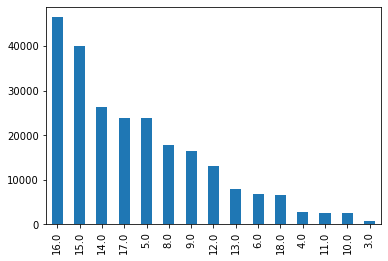

In [1478]:
train_df.Product_Category_3.value_counts().plot.bar()

<AxesSubplot:>

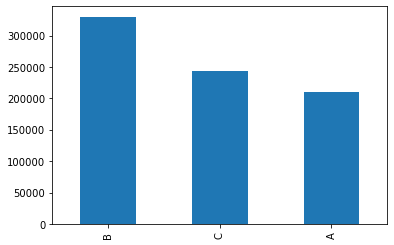

In [1479]:
train_df.City_Category.value_counts().plot.bar()
# City_Category B has the highest count purchases

In [1480]:
# Let us analyze the null data to understand mode details about the null values
train_null=train_df[pd.isnull(train_df.Product_Category_2)]

In [1481]:
train_null.shape

(245982, 13)

In [1482]:
# There are no duplicates in train null
train_null.duplicated().sum()

0

<AxesSubplot:>

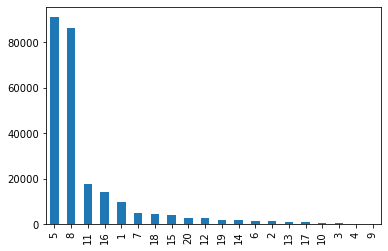

In [1483]:
# Please note that most of the Null values in Prod_Category 2 & 3 are for the Product_Catergory1 ID's (5,8)
train_null.Product_Category_1.value_counts().plot.bar()

<AxesSubplot:>

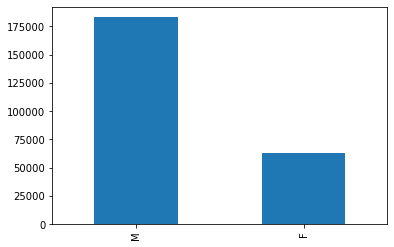

In [1484]:
# Most of the null values are for the Gender Male as purchases are done more by males
train_null.Gender.value_counts().plot.bar()

<AxesSubplot:>

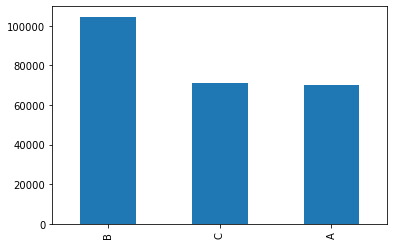

In [1485]:
train_null.City_Category.value_counts().plot.bar()

In [1486]:
# Now let us try to understand the correlation between the independent and dependent variables
train_df.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023976,0.020276,0.004568,0.002291,0.002490,0.004716
Occupation,-0.023976,1.000000,0.023563,-0.008441,-0.000773,0.010450,0.020833
Marital_Status,0.020276,0.023563,1.000000,0.019579,0.017131,0.018471,-0.000463
Product_Category_1,0.004568,-0.008441,0.019579,1.000000,0.540426,0.228299,-0.343703
Product_Category_2,0.002291,-0.000773,0.017131,0.540426,1.000000,0.543578,-0.209918
Product_Category_3,0.002490,0.010450,0.018471,0.228299,0.543578,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


In [1487]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
 12  Source                      783667 non-null  object 
dtypes: float64(3),

In [1488]:
# We could observe that User ID is negligibly correlated with the Purchase data
# Let us now try to convert the needed object datatypes into int/numeric types

# We could see Gender, Age, City Category as categorical values so we can try to use One Hot encoding for them
# we need to understand the Product ID, and we need to fix the Stay_in_Current_City_Years columns and we need to fill the missing values 
# for Prod_Category 2 & 3

In [1489]:
one_hot_data=pd.get_dummies(train_df[['Gender','Age','City_Category']],columns=['Gender','Age','City_Category'])

In [1490]:
one_hot_data

,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C
0,1,0,1,0,0,0,0,0,0,1,0,0
1,1,0,1,0,0,0,0,0,0,1,0,0
2,1,0,1,0,0,0,0,0,0,1,0,0
3,1,0,1,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1,0,0,0,1,0,0,0,0,0,1,0
233595,1,0,0,0,1,0,0,0,0,0,1,0
233596,1,0,0,0,1,0,0,0,0,0,1,0
233597,1,0,0,0,0,0,1,0,0,0,0,1


In [1491]:
# Product ID starts with P and it is the unique value across the data, so let us convert it into
train_df['Product_ID'].str[:1].unique()

array(['P'], dtype=object)

In [1492]:
train_df['Product_ID']=train_df['Product_ID'].str.replace('P', '1')

In [1493]:
# we have now converted Product_ID into int32
train_df['Product_ID']=train_df['Product_ID'].astype('int')

In [1494]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  int32  
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
 12  Source                      783667 non-null  object 
dtypes: float64(3),

In [1495]:
# We have noticed that Stay in Current City has '+' so it is of type object, so let us remove + and convert it to int
train_df.Stay_In_Current_City_Years.value_counts()

1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64

In [1496]:
train_df['Stay_In_Current_City_Years']=train_df.Stay_In_Current_City_Years.str.replace('+','')

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_2832/2588290927.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train_df['Stay_In_Current_City_Years']=train_df.Stay_In_Current_City_Years.str.replace('+','')


In [1497]:
train_df.Stay_In_Current_City_Years.value_counts()

1    276425
2    145427
3    135428
4    120671
0    105716
Name: Stay_In_Current_City_Years, dtype: int64

In [1498]:
train_df['Stay_In_Current_City_Years']=train_df['Stay_In_Current_City_Years'].astype('int')

In [1499]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  int32  
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  int32  
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
 12  Source                      783667 non-null  object 
dtypes: float64(3),

In [1500]:
train_n=pd.concat([train_df,one_hot_data],axis=1)

In [1501]:
train_n.shape

(783667, 25)

In [1502]:
one_hot_data.shape

(783667, 12)

In [1503]:
train_df.shape

(783667, 13)

In [1504]:
train_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  int32  
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  int32  
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
 12  Source                      783667 non-null  object 
 13  Gender_F      

In [1505]:
train_new=train_n.drop(columns=['Age','Gender','City_Category','User_ID'],axis=1)

In [1506]:
train_new.shape

(783667, 21)

In [1507]:
train_n.shape

(783667, 25)

In [1508]:
# Now we have all the columns as int/float so that we can train the model
train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  int32  
 1   Occupation                  783667 non-null  int64  
 2   Stay_In_Current_City_Years  783667 non-null  int32  
 3   Marital_Status              783667 non-null  int64  
 4   Product_Category_1          783667 non-null  int64  
 5   Product_Category_2          537685 non-null  float64
 6   Product_Category_3          237858 non-null  float64
 7   Purchase                    550068 non-null  float64
 8   Source                      783667 non-null  object 
 9   Gender_F                    783667 non-null  uint8  
 10  Gender_M                    783667 non-null  uint8  
 11  Age_0-17                    783667 non-null  uint8  
 12  Age_18-25                   783667 non-null  uint8  
 13  Age_26-35     

In [1509]:
# Now we have to replace the missing values in Product_category2 and 3 and we need to scale the data as few values are in varying scale
train_new.corr()

,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C
Product_ID,1.000000,0.005107,-0.000793,0.003624,0.038966,0.052248,0.042289,0.019816,-0.013420,0.013420,-0.009650,-0.011789,0.002631,0.004369,0.003931,0.004213,0.004721,-0.002682,-0.007715,0.010796
Occupation,0.005107,1.000000,0.028488,0.023563,-0.008441,-0.000773,0.010450,0.020833,-0.116505,0.116505,0.018174,-0.096874,-0.022063,0.058312,0.021118,0.029189,0.044180,-0.023772,-0.011721,0.035255
Stay_In_Current_City_Years,-0.000793,0.028488,1.000000,-0.012871,-0.003518,-0.000994,0.000701,0.005422,-0.015026,0.015026,-0.009545,-0.013674,0.022934,0.012763,-0.024446,-0.017113,0.008266,-0.023769,0.011011,0.011007
Marital_Status,0.003624,0.023563,-0.012871,1.000000,0.019579,0.017131,0.018471,-0.000463,0.010945,-0.010945,-0.139389,-0.188890,-0.026761,-0.014686,0.190833,0.172811,0.090960,-0.032790,-0.002804,0.034377
Product_Category_1,0.038966,-0.008441,-0.003518,0.019579,1.000000,0.540426,0.228299,-0.343703,0.046208,-0.046208,-0.014078,-0.035541,-0.017303,0.011570,0.025561,0.025315,0.032572,0.017750,-0.003863,-0.012870
Product_Category_2,0.052248,-0.000773,-0.000994,0.017131,0.540426,1.000000,0.543578,-0.209918,0.017873,-0.017873,-0.026978,-0.035279,-0.004717,0.011235,0.019646,0.023161,0.024353,0.012376,-0.003463,-0.007980
Product_Category_3,0.042289,0.010450,0.000701,0.018471,0.228299,0.543578,1.000000,-0.022006,-0.026824,0.026824,-0.034089,-0.030974,-0.005553,0.010415,0.019298,0.026778,0.024020,0.001735,-0.000629,-0.000932
Purchase,0.019816,0.020833,0.005422,-0.000463,-0.343703,-0.209918,-0.022006,1.000000,-0.060346,0.060346,-0.011055,-0.008831,-0.001830,0.006707,-0.003317,0.014792,0.002904,-0.042465,-0.019098,0.061012
Gender_F,-0.013420,-0.116505,-0.015026,0.010945,0.046208,0.017873,-0.026824,-0.060346,1.000000,-1.000000,0.034153,-0.000062,-0.029675,0.001007,0.028002,0.007025,-0.004809,-0.006204,0.005399,0.000180
Gender_M,0.013420,0.116505,0.015026,-0.010945,-0.046208,-0.017873,0.026824,0.060346,-1.000000,1.000000,-0.034153,0.000062,0.029675,-0.001007,-0.028002,-0.007025,0.004809,0.006204,-0.005399,-0.000180


<AxesSubplot:>

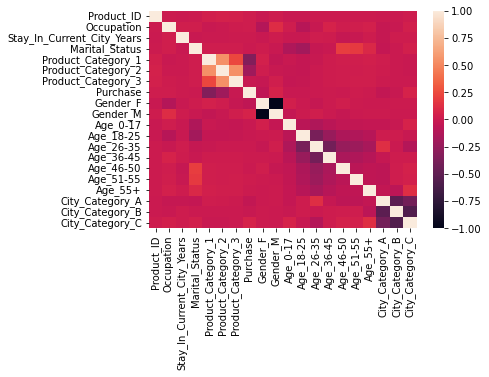

In [1510]:
sns.heatmap(train_new.corr())

In [1511]:
train_new.Product_Category_2.fillna(0,inplace=True)

In [1512]:
train_new.Product_Category_3.fillna(0,inplace=True)

In [1513]:
train_new.isnull().sum()

Product_ID                         0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
Source                             0
Gender_F                           0
Gender_M                           0
Age_0-17                           0
Age_18-25                          0
Age_26-35                          0
Age_36-45                          0
Age_46-50                          0
Age_51-55                          0
Age_55+                            0
City_Category_A                    0
City_Category_B                    0
City_Category_C                    0
dtype: int64

In [1514]:
train_new.Source.value_counts()

train    550068
test     233599
Name: Source, dtype: int64

In [1515]:
TRAIN_NEW=train_new[(train_new['Source']=='train')]

#tests_df[(tests_df['grade'] > 10)]

In [1516]:
TRAIN_NEW.shape

(550068, 21)

In [1517]:
TEST_NEW=train_new[(train_new['Source']=='test')]

#tests_df[(tests_df['grade'] > 10)]

In [1518]:
TEST_NEW.shape

(233599, 21)

In [1519]:
TEST_NEW.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233599 entries, 0 to 233598
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  233599 non-null  int32  
 1   Occupation                  233599 non-null  int64  
 2   Stay_In_Current_City_Years  233599 non-null  int32  
 3   Marital_Status              233599 non-null  int64  
 4   Product_Category_1          233599 non-null  int64  
 5   Product_Category_2          233599 non-null  float64
 6   Product_Category_3          233599 non-null  float64
 7   Purchase                    0 non-null       float64
 8   Source                      233599 non-null  object 
 9   Gender_F                    233599 non-null  uint8  
 10  Gender_M                    233599 non-null  uint8  
 11  Age_0-17                    233599 non-null  uint8  
 12  Age_18-25                   233599 non-null  uint8  
 13  Age_26-35     

In [1520]:
TRAIN_NEW.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 0 to 550067
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  int32  
 1   Occupation                  550068 non-null  int64  
 2   Stay_In_Current_City_Years  550068 non-null  int32  
 3   Marital_Status              550068 non-null  int64  
 4   Product_Category_1          550068 non-null  int64  
 5   Product_Category_2          550068 non-null  float64
 6   Product_Category_3          550068 non-null  float64
 7   Purchase                    550068 non-null  float64
 8   Source                      550068 non-null  object 
 9   Gender_F                    550068 non-null  uint8  
 10  Gender_M                    550068 non-null  uint8  
 11  Age_0-17                    550068 non-null  uint8  
 12  Age_18-25                   550068 non-null  uint8  
 13  Age_26-35     

#### Scaling the Data 

In [1521]:
#### The values in the data is in different ranges, so let us standardize the data using the Standard Scalar

scale=StandardScaler()

In [1522]:
# let us now remove the target variable from the train data
train_new_x=TRAIN_NEW.drop(columns=['Purchase','Source'],axis=1)

In [1523]:
test_new_x=TEST_NEW.drop(columns=['Purchase','Source'],axis=1)

In [1524]:
train_new_x.shape

(550068, 19)

In [1525]:
train_new_y=TRAIN_NEW['Purchase']

In [1526]:
train_new_y.shape

(550068,)

In [1527]:
# Now let us standardize the train data
scaled_train_x=scale.fit_transform(train_new_x)

In [1528]:
scaled_test_x=scale.fit_transform(test_new_x)

In [1529]:
test_X_sub=pd.DataFrame(scaled_test_x,columns=test_new_x.columns)

In [1530]:
test_X_sub.shape

(233599, 19)

In [1531]:
scaled_train_x

array([[ 0.12343636,  0.29486356,  0.10980142, ...,  1.65036982,
        -0.85142167, -0.67214331],
       [ 0.13876525,  0.29486356,  0.10980142, ...,  1.65036982,
        -0.85142167, -0.67214331],
       [ 0.12503827,  0.29486356,  0.10980142, ...,  1.65036982,
        -0.85142167, -0.67214331],
       ...,
       [ 0.14954353,  1.06142262,  1.66086068, ..., -0.6059248 ,
         1.17450616, -0.67214331],
       [ 0.14954353, -1.08494277,  0.10980142, ..., -0.6059248 ,
        -0.85142167,  1.48777797],
       [ 0.14922042, -1.23825458,  1.66086068, ..., -0.6059248 ,
         1.17450616, -0.67214331]])

In [1532]:
train_X=pd.DataFrame(scaled_train_x,columns=train_new_x.columns)

In [1533]:
#train_X1=train_X.drop(columns=['Product_Category_2','Product_Category_3'],axis=1)

In [1534]:
train_X

,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C
0,0.123436,0.294864,0.109801,-0.833018,-0.610809,-1.083654,-0.614641,1.746513,-1.746513,5.951766,-0.470389,-0.815136,-0.499998,-0.301016,-0.274337,-0.201702,1.650370,-0.851422,-0.672143
1,0.138765,0.294864,0.109801,-0.833018,-1.118912,-0.118323,1.625106,1.746513,-1.746513,5.951766,-0.470389,-0.815136,-0.499998,-0.301016,-0.274337,-0.201702,1.650370,-0.851422,-0.672143
2,0.125038,0.294864,0.109801,-0.833018,1.675656,-1.083654,-0.614641,1.746513,-1.746513,5.951766,-0.470389,-0.815136,-0.499998,-0.301016,-0.274337,-0.201702,1.650370,-0.851422,-0.672143
3,0.124834,0.294864,0.109801,-0.833018,1.675656,1.168785,-0.614641,1.746513,-1.746513,5.951766,-0.470389,-0.815136,-0.499998,-0.301016,-0.274337,-0.201702,1.650370,-0.851422,-0.672143
4,0.141875,1.214734,1.660861,-0.833018,0.659449,-1.083654,-0.614641,-0.572570,0.572570,-0.168017,-0.470389,-0.815136,-0.499998,-0.301016,-0.274337,4.957802,-0.605925,-0.851422,1.487778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,0.149289,0.754799,-0.665728,1.200454,3.708069,-1.083654,-0.614641,-0.572570,0.572570,-0.168017,-0.470389,-0.815136,-0.499998,-0.301016,3.645149,-0.201702,-0.605925,1.174506,-0.672143
550064,0.149544,-1.084943,0.885331,-0.833018,3.708069,-1.083654,-0.614641,1.746513,-1.746513,-0.168017,-0.470389,1.226789,-0.499998,-0.301016,-0.274337,-0.201702,-0.605925,-0.851422,1.487778
550065,0.149544,1.061423,1.660861,1.200454,3.708069,-1.083654,-0.614641,1.746513,-1.746513,-0.168017,-0.470389,1.226789,-0.499998,-0.301016,-0.274337,-0.201702,-0.605925,1.174506,-0.672143
550066,0.149544,-1.084943,0.109801,-0.833018,3.708069,-1.083654,-0.614641,1.746513,-1.746513,-0.168017,-0.470389,-0.815136,-0.499998,-0.301016,-0.274337,4.957802,-0.605925,-0.851422,1.487778


In [1535]:
train_new_y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64

In [1536]:
# Now let us split the data using the train_test_split
TRAIN_X,TEST_X,TRAIN_Y,TEST_Y=train_test_split(train_X, train_new_y, test_size=0.33, random_state=8)

In [1537]:
TRAIN_X.shape

(368545, 19)

In [1538]:
TEST_X.shape

(181523, 19)

In [1539]:
TRAIN_Y.shape

(368545,)

#### Prediction using Linear Regression

In [1540]:
# Let us define the model
model=LinearRegression()

In [1541]:
# Let us train the model
model.fit(TRAIN_X,TRAIN_Y)

LinearRegression()

In [1542]:
# Let us now get the model Coefficient(slope) and the intercept(constant) values
model.coef_,model.intercept_

(array([ 1.46687836e+02,  3.85665312e+01,  1.06511496e+01, -2.54528588e+01,
        -1.37692137e+03,  8.14385525e+01,  8.97883734e+02,  1.71419372e+11,
         1.71419372e+11, -1.92058533e+14, -4.52706545e+14, -5.75612007e+14,
        -4.70141694e+14, -3.24406440e+14, -2.99875199e+14, -2.27804186e+14,
        -9.50088286e+14, -1.05812214e+15, -9.92480196e+14]),
 9265.07776150608)

In [1543]:
# Now let us predict the values for Train data so that we can calculate the error for train data
train_pred=model.predict(TRAIN_X)

In [1544]:
train_pred.shape

(368545,)

In [1545]:
# Now let us calculate the error values using the error functions for train data
# Mean Squared Error
# Root Mean Squared Error
# Mean Absolute Error
# Mean Absolute Percentage Error

mse = mean_squared_error(TRAIN_Y,train_pred)
rmse = mean_squared_error(TRAIN_Y,train_pred,squared=False)
mae = mean_absolute_error(TRAIN_Y,train_pred)
mape= mean_absolute_percentage_error(TRAIN_Y,train_pred)
#msle = mean_squared_log_error(train_y,train_pred)
mse,rmse,mae,mape

(21349231.11525345, 4620.522818389002, 3528.7480253435688, 1.162389082304021)

In [1546]:
test_pred=model.predict(TEST_X)

In [1561]:
model.predict(TRAIN_X)

array([ 8083.47141033,  7769.72141033,  8325.22141033, ...,
       10186.47141033,  4994.59641033, 10218.59641033])

In [1547]:
model.predict(TEST_X)

array([ 7985.72141033,  9505.49794832,  8884.72141033, ...,
       11159.34641033,  8048.72141033,  8654.84641033])

In [1548]:
mse_test = mean_squared_error(TEST_Y,test_pred)
rmse_test = mean_squared_error(TEST_Y,test_pred,squared=False)
mae_test = mean_absolute_error(TEST_Y,test_pred)
mape_test= mean_absolute_percentage_error(TEST_Y,test_pred)
#msle = mean_squared_log_error(test_y,test_pred)
# Test Error values
mse_test,rmse_test,mae_test,mape_test

(21365779.588230103, 4622.313229134315, 3529.473966364531, 1.115003629323263)

In [1549]:
model.predict(test_X_sub)

array([ 6.64196637e+12, -2.73929525e+11,  1.93852494e+12, ...,
        2.38838652e+12,  3.97965032e+12,  6.64196637e+12])

In [1550]:
test_sub.tolist()

[6641966369083.642,
 -273929524793.97153,
 1938524935950.141,
 1938524936251.516,
 -273929523989.72153,
 3979650325973.5283,
 3979650326444.2783,
 3979650324009.2783,
 -1043192483012.734,
 -1736003072583.234,
 2388386522726.266,
 2388386519073.266,
 2388386521189.141,
 2388386519177.516,
 -273929525537.97153,
 -723791107147.4716,
 3210387360993.516,
 3210387366795.516,
 -1736003073243.484,
 3979650323287.0283,
 2388386519088.016,
 2388386521015.766,
 -273929522049.72153,
 3210387367805.766,
 3210387364296.266,
 3210387364452.766,
 2388386521282.516,
 2388386521140.641,
 2388386523030.141,
 2388386521929.641,
 2388386519286.516,
 2388386519223.266,
 2388386519194.016,
 -226020408784.10898,
 -1493054071741.984,
 -966740114646.7216,
 -966740115963.7216,
 -723791106983.9716,
 -1736003071355.984,
 -1043192485056.484,
 -1736003070613.484,
 3979650323584.2783,
 -4189261793539.7217,
 -1043192485075.484,
 -1043192483969.734,
 -273929526738.47153,
 -4189261801733.4717,
 1695575929621.141,
 16955

In [1551]:
t_sub=test_df[['User_ID','Product_ID']]

In [1552]:
t_sub['Purchase']=test_sub.tolist()

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_2832/3472336493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_sub['Purchase']=test_sub.tolist()


In [1553]:
t_sub

,User_ID,Product_ID,Purchase
0,1000004,P00128942,6.641966e+12
1,1000009,P00113442,-2.739295e+11
2,1000010,P00288442,1.938525e+12
3,1000010,P00145342,1.938525e+12
4,1000011,P00053842,-2.739295e+11
...,...,...,...
233594,1006036,P00118942,2.388387e+12
233595,1006036,P00254642,2.388387e+12
233596,1006036,P00031842,2.388387e+12
233597,1006037,P00124742,3.979650e+12


In [1554]:
t_sub_final=t_sub[['Purchase','User_ID','Product_ID']]

In [1555]:
t_sub_final

,Purchase,User_ID,Product_ID
0,6.641966e+12,1000004,P00128942
1,-2.739295e+11,1000009,P00113442
2,1.938525e+12,1000010,P00288442
3,1.938525e+12,1000010,P00145342
4,-2.739295e+11,1000011,P00053842
...,...,...,...
233594,2.388387e+12,1006036,P00118942
233595,2.388387e+12,1006036,P00254642
233596,2.388387e+12,1006036,P00031842
233597,3.979650e+12,1006037,P00124742


In [1556]:
t_sub_final.to_csv('black_friday.csv',index=False)

In [1557]:
test_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Source
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,test
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,test
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,test
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,test
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,test


In [1558]:
TEST_NEW.head()

,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Source,Gender_F,...,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C
0,100128942,7,2,1,1,11.0,0.0,NaN,test,0,...,0,0,0,0,1,0,0,0,1,0
1,100113442,17,0,0,3,5.0,0.0,NaN,test,0,...,0,0,1,0,0,0,0,0,0,1
2,100288442,1,4,1,5,14.0,0.0,NaN,test,1,...,0,0,0,1,0,0,0,0,1,0
3,100145342,1,4,1,4,9.0,0.0,NaN,test,1,...,0,0,0,1,0,0,0,0,1,0
4,100053842,1,1,0,4,5.0,12.0,NaN,test,1,...,0,0,1,0,0,0,0,0,0,1


In [1559]:
test_X_sub.head()

,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C
0,0.130174,-0.166445,0.110432,1.199419,-1.144571,0.675619,-0.615789,-0.573575,0.573575,-0.165558,-0.470186,-0.816412,-0.499941,3.306406,-0.273729,-0.201044,-0.604547,1.170460,-0.670906
1,0.128867,1.367031,-1.443264,-0.833737,-0.609292,-0.289376,-0.615789,-0.573575,0.573575,-0.165558,-0.470186,1.224872,-0.499941,-0.302443,-0.273729,-0.201044,-0.604547,-0.854365,1.490522
2,0.143622,-1.086530,1.664128,1.199419,-0.074014,1.158116,-0.615789,1.743450,-1.743450,-0.165558,-0.470186,-0.816412,2.000235,-0.302443,-0.273729,-0.201044,-0.604547,1.170460,-0.670906
3,0.131556,-1.086530,1.664128,1.199419,-0.341653,0.353954,-0.615789,1.743450,-1.743450,-0.165558,-0.470186,-0.816412,2.000235,-0.302443,-0.273729,-0.201044,-0.604547,1.170460,-0.670906
4,0.123842,-1.086530,-0.666416,-0.833737,-0.341653,-0.289376,1.302180,1.743450,-1.743450,-0.165558,-0.470186,1.224872,-0.499941,-0.302443,-0.273729,-0.201044,-0.604547,-0.854365,1.490522


In [1560]:
train_X.head()

,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C
0,0.123436,0.294864,0.109801,-0.833018,-0.610809,-1.083654,-0.614641,1.746513,-1.746513,5.951766,-0.470389,-0.815136,-0.499998,-0.301016,-0.274337,-0.201702,1.650370,-0.851422,-0.672143
1,0.138765,0.294864,0.109801,-0.833018,-1.118912,-0.118323,1.625106,1.746513,-1.746513,5.951766,-0.470389,-0.815136,-0.499998,-0.301016,-0.274337,-0.201702,1.650370,-0.851422,-0.672143
2,0.125038,0.294864,0.109801,-0.833018,1.675656,-1.083654,-0.614641,1.746513,-1.746513,5.951766,-0.470389,-0.815136,-0.499998,-0.301016,-0.274337,-0.201702,1.650370,-0.851422,-0.672143
3,0.124834,0.294864,0.109801,-0.833018,1.675656,1.168785,-0.614641,1.746513,-1.746513,5.951766,-0.470389,-0.815136,-0.499998,-0.301016,-0.274337,-0.201702,1.650370,-0.851422,-0.672143
4,0.141875,1.214734,1.660861,-0.833018,0.659449,-1.083654,-0.614641,-0.572570,0.572570,-0.168017,-0.470389,-0.815136,-0.499998,-0.301016,-0.274337,4.957802,-0.605925,-0.851422,1.487778
